<a href="https://colab.research.google.com/github/Amiyadas02/UNP-PROJECT-HR-DATA-WITH-MY-SQL/blob/main/UNP_PROJECT_GROUP_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
mi=pd.read_excel('/content/Insurance Premium.xlsx')

In [ ]:
mi

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(mi.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
mi.shape

(1338, 7)

In [ ]:
print(mi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
mi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
mi.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


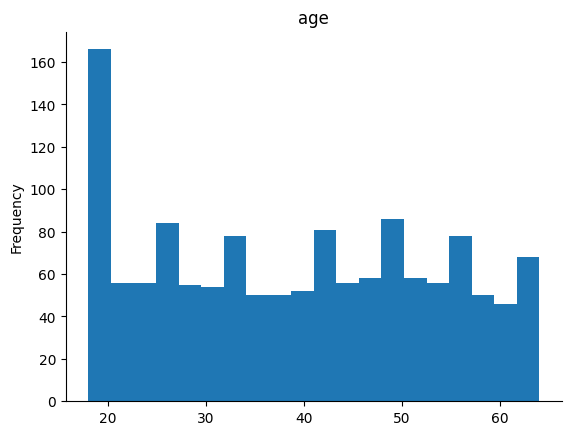

In [ ]:
from matplotlib import pyplot as plt
mi['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

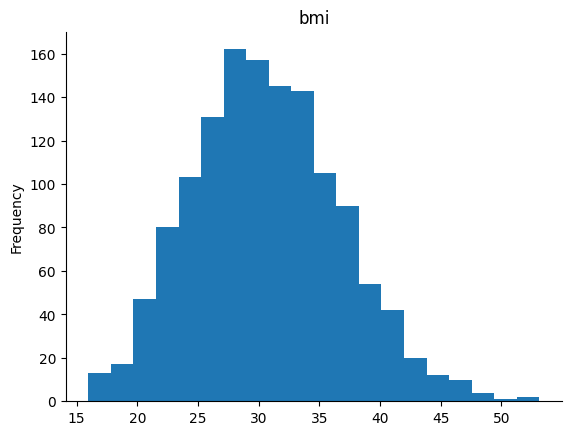

In [ ]:
from matplotlib import pyplot as plt
mi['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

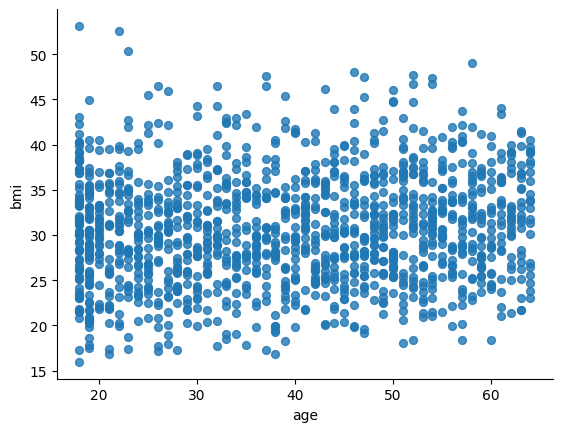

In [ ]:
from matplotlib import pyplot as plt
mi.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

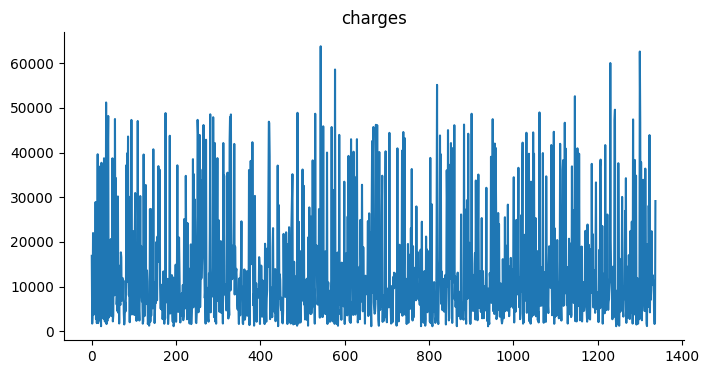

In [ ]:
from matplotlib import pyplot as plt
mi['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

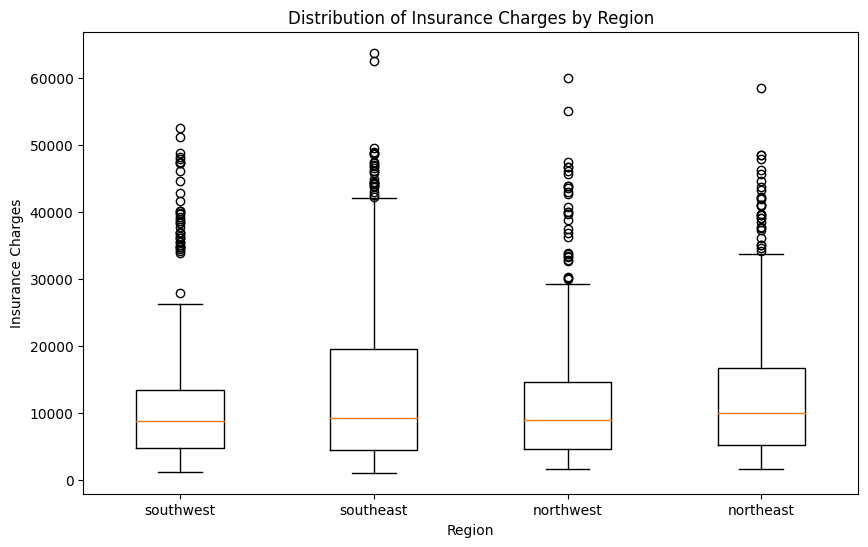

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([mi[mi['region'] == r]['charges'] for r in mi['region'].unique()], labels=mi['region'].unique())
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
_ = plt.title('Distribution of Insurance Charges by Region')


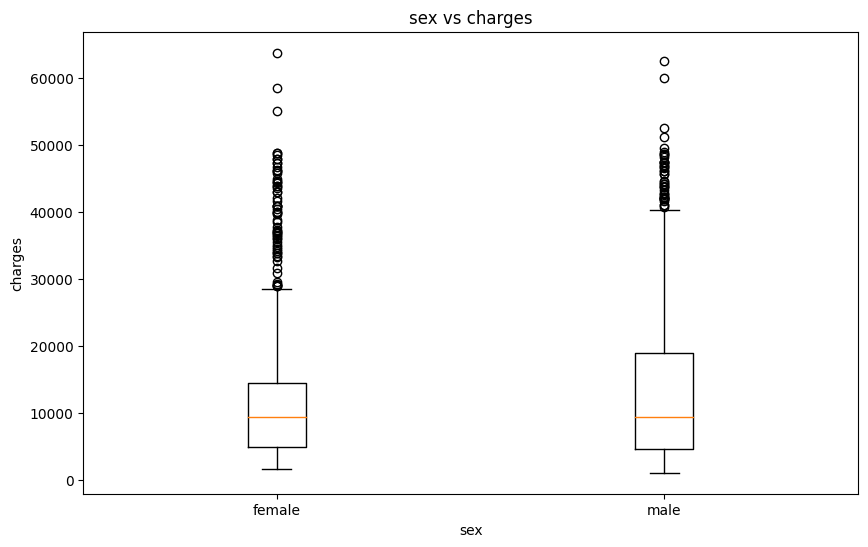

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([mi[mi['sex'] == r]['charges'] for r in mi['sex'].unique()], labels=mi['sex'].unique())
plt.xlabel('sex')
plt.ylabel('charges')
_ = plt.title('sex vs charges')

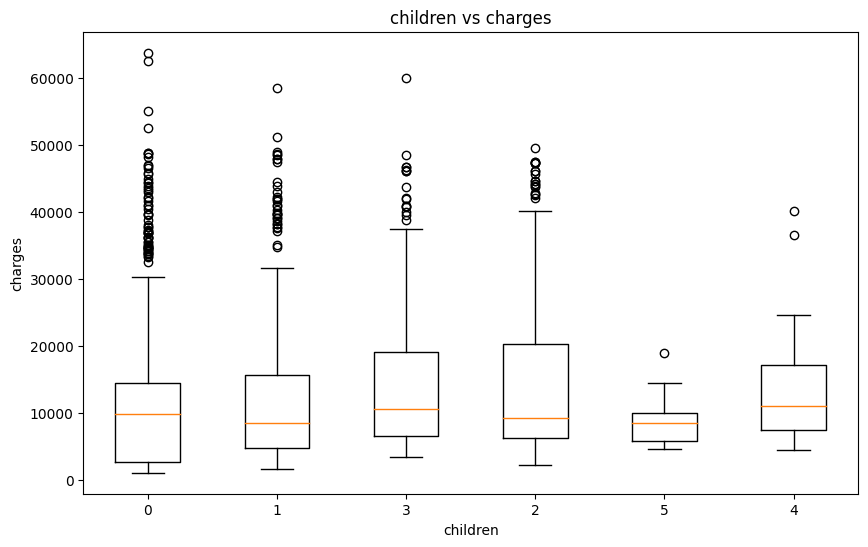

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot([mi[mi['children'] == r]['charges'] for r in mi['children'].unique()], labels=mi['children'].unique())
plt.xlabel('children')
plt.ylabel('charges')
_ = plt.title('children vs charges')

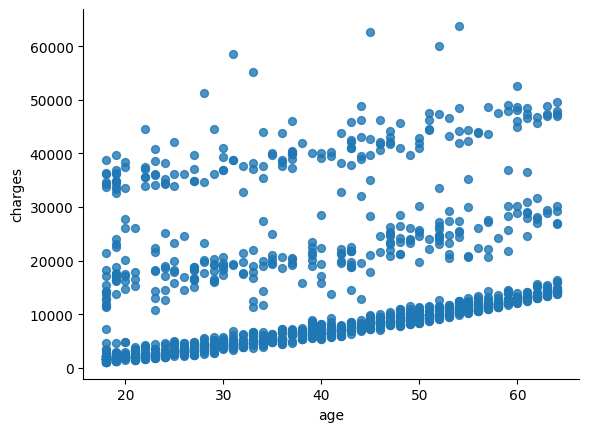

In [ ]:
from matplotlib import pyplot as plt
mi.plot(kind='scatter', x='age', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

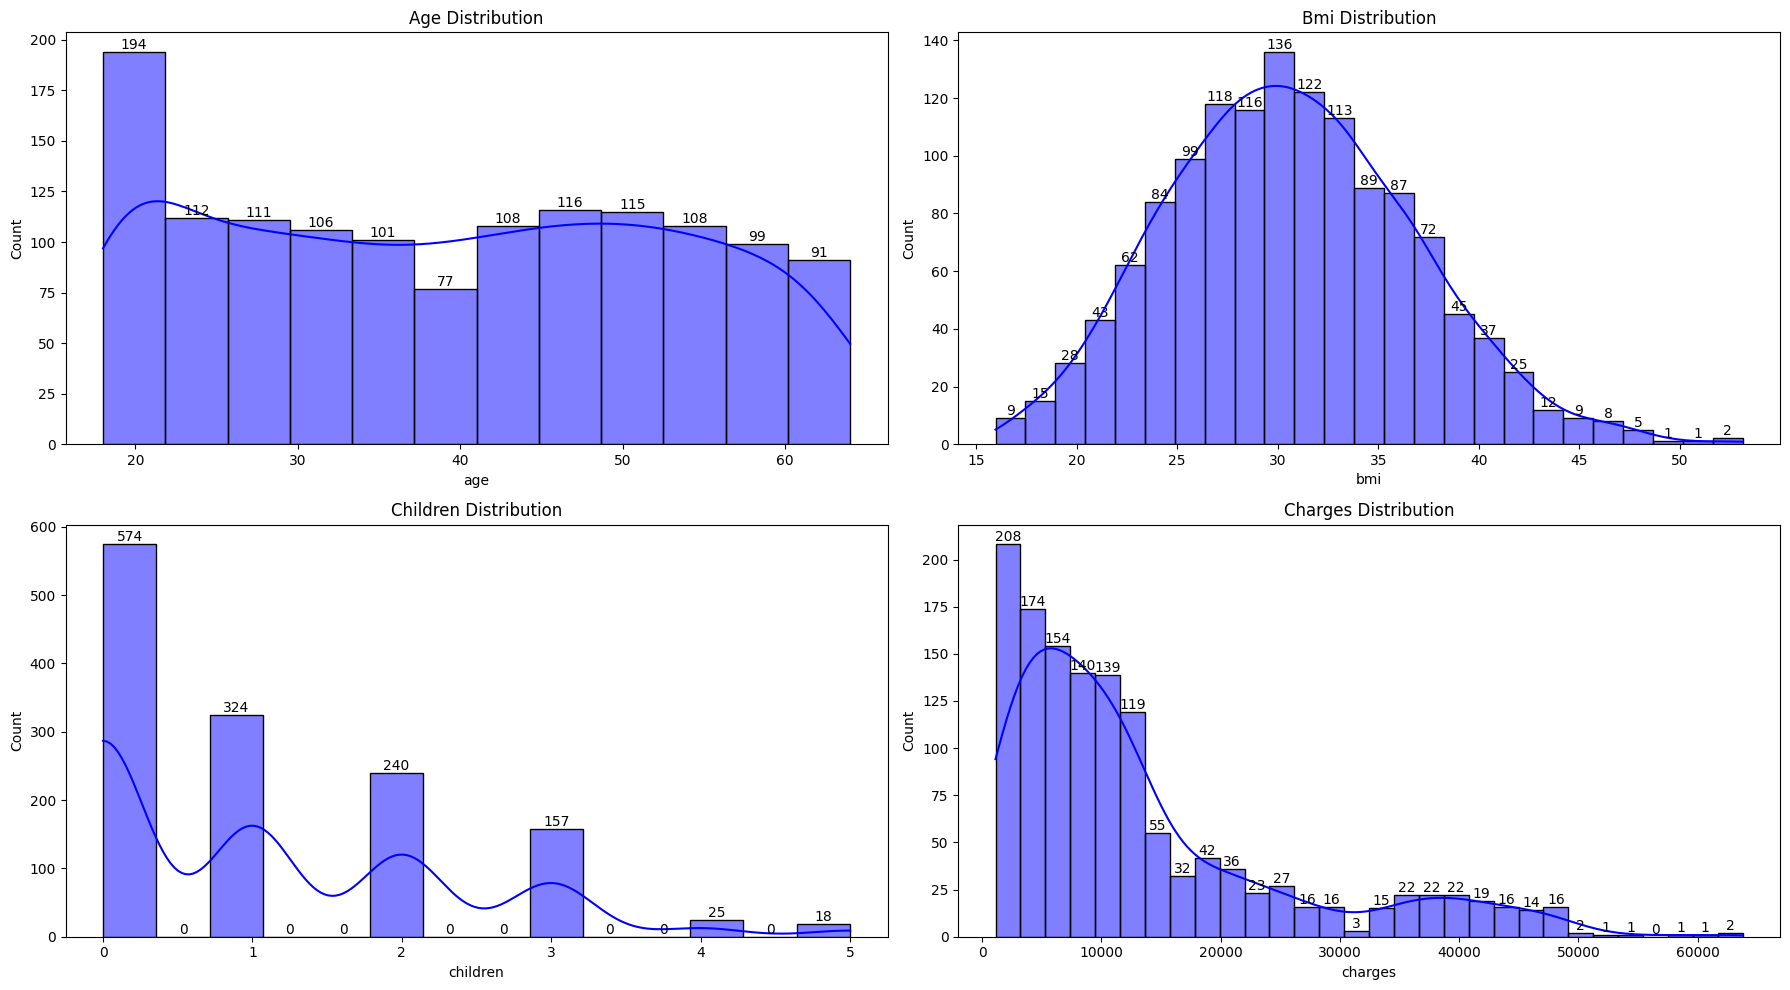

In [ ]:
mi_dummy = pd.get_dummies(mi, drop_first=True)

plt.figure(figsize=(18, 10))
for id, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, id+1)

    ax = sns.histplot(mi_dummy[col], kde=True, color='blue')

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
                int(p.get_height()),
                ha="center", va="bottom", fontsize=10)

    plt.title(f'{col.capitalize()} Distribution')

plt.tight_layout()
plt.show()

<ipython-input-40-fddafb0b2521>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=custom_palette)
<ipython-input-40-fddafb0b2521>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=custom_palette)


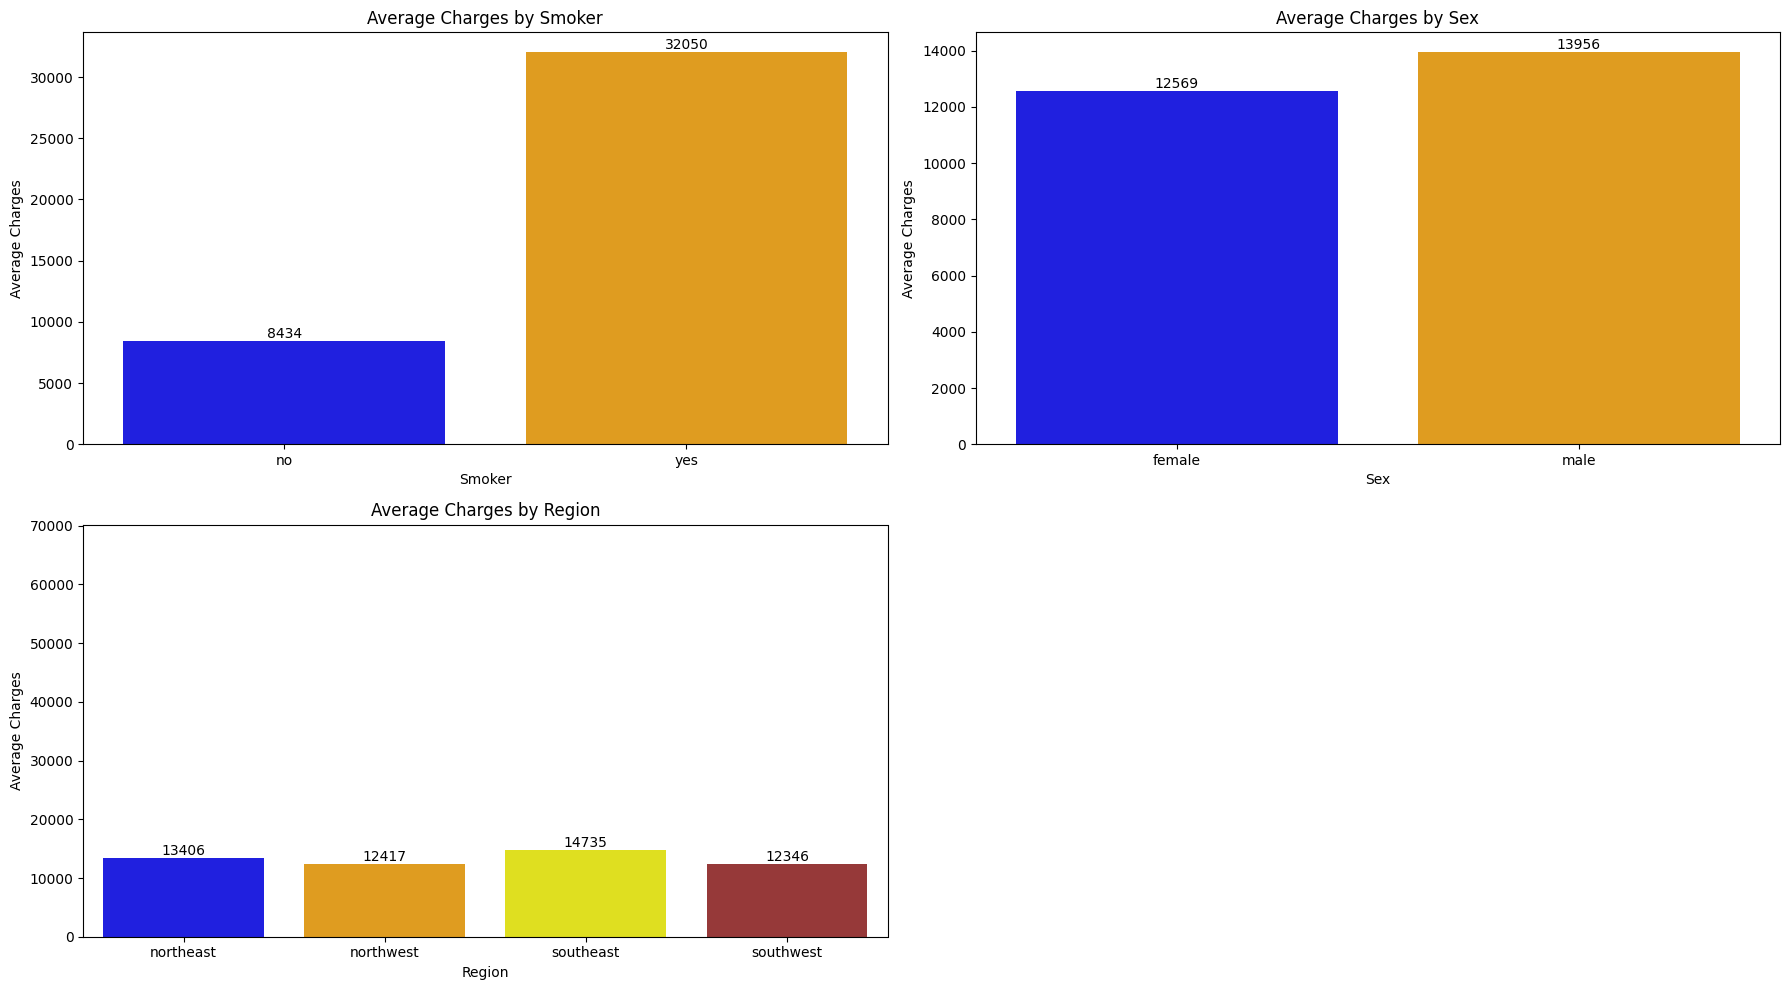

In [ ]:

custom_palette = ['blue', 'orange', 'yellow', 'brown']

plt.figure(figsize=(18, 10))
for id, col in enumerate(['smoker', 'sex', 'region']):
    plt.subplot(2, 2, id + 1)


    avg_charges = mi.groupby([col])['charges'].mean().sort_index()


    ax = sns.barplot(x=avg_charges.index, y=avg_charges.values, palette=custom_palette)


    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
                f'{int(p.get_height())}',
                ha="center", va="bottom", fontsize=10)

    plt.title(f'Average Charges by {col.capitalize()}')
    plt.ylabel('Average Charges')
    plt.xlabel(f'{col.capitalize()}')


plt.ylim(0, mi['charges'].max() * 1.1)

plt.tight_layout()
plt.show()


In [ ]:
mi_dummy=pd.get_dummies(mi,drop_first=True)

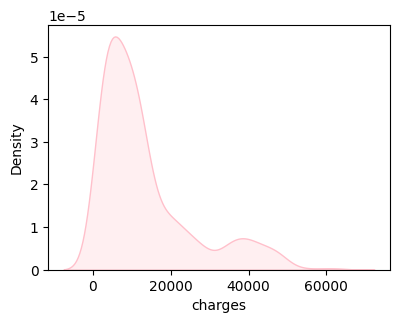

In [ ]:
plt.figure(figsize=(15,7))
for id, col in enumerate(['charges']):
  plt.subplot(2,3,id+1)
  sns.kdeplot(mi_dummy[col], fill=True, color='pink')

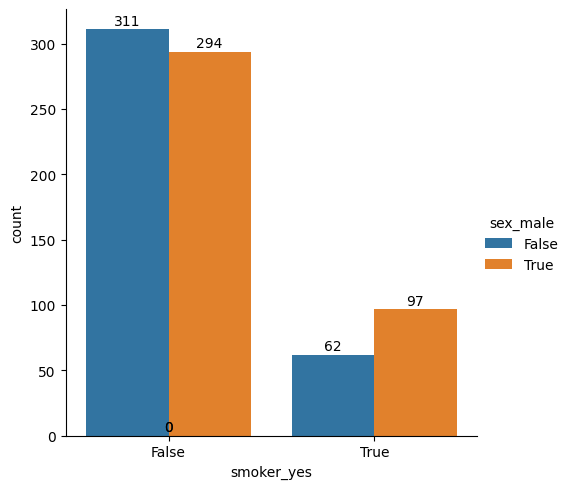

In [ ]:
g = sns.catplot(x="smoker_yes",
            kind="count",
            hue="sex_male",
            data = mi_dummy[(mi_dummy.children > 0)])

for ax in g.fig.axes:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,
                int(p.get_height()),
                ha="center", va="bottom", fontsize=10)

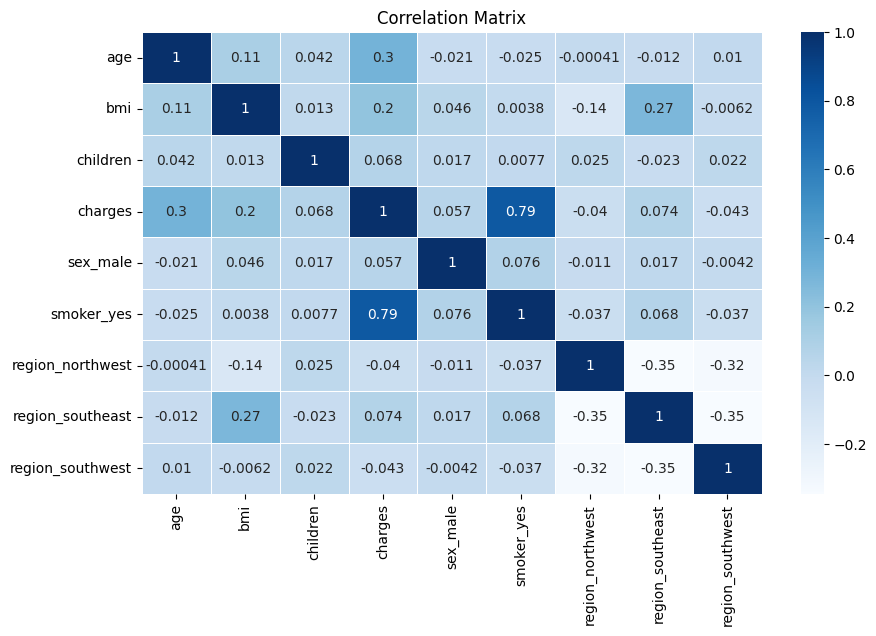

In [ ]:
corr_matrix = mi_dummy[['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
                  'region_northwest', 'region_southeast', 'region_southwest']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)  # Change 'Blues' to any colormap you like
plt.title('Correlation Matrix')
plt.show()


In [ ]:
mi_dummy

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
print(mi_dummy.dtypes)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
mi_numeric = mi_dummy.select_dtypes(include=[np.number])

vif_data = pd.DataFrame()
vif_data["Feature"] = mi_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(mi_numeric.values, i) for i in range(mi_numeric.shape[1])]

print(vif_data)

    Feature       VIF
0       age  8.098132
1       bmi  8.044400
2  children  1.800015
3   charges  2.473524


In [ ]:
X = mi_dummy.drop(['charges'],axis=1)
y = mi_dummy['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(936, 8) (936,) (402, 8) (402,)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
linear = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})

In [ ]:
linear.head(10)

,Predicted,Actual
764,9016.367529,9095.06825
887,7019.976349,5272.17580
890,36870.834268,29330.98315
1293,9518.537736,9301.89355
259,26974.030822,33750.29180
1312,11080.846222,4536.25900
899,-40.617760,2117.33885
752,17192.233074,14210.53595
1286,974.950536,3732.62510
707,11329.959373,10264.44210


In [ ]:
r2_score(y_test,y_pred)

0.7696118054369011

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

4145.450555627587

In [ ]:
mean_squared_error(y_test,y_pred)

33780509.57479164

In [ ]:
def mean_absolute_percentage_error(y_test, y_pred):
    mask = y_test != 0
    y_test, y_pred = np.array(y_test)[mask], np.array(y_pred)[mask]
    absolute_percentage_error = np.abs((y_test - y_pred) / y_test)
    mape = np.mean(absolute_percentage_error) * 100
    return mape

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

43.58562599194319

In [ ]:
model.coef_

array([  261.29692414,   348.90691516,   424.11912829,   104.81182299,
       23628.36722236,  -486.93461047,  -970.96883857,  -926.32290791])

In [ ]:
model.intercept_

-12373.963903035481

In [ ]:
Logistic Regression

In [ ]:
df1 = mi_dummy.copy()

charges_med = df1['charges'].median()
df1['catcharges'] = [1 if x > charges_med else 0 for x in df1['charges']]

df1['catcharges'].value_counts(normalize = True)
df1 = df1.drop('charges', axis=1)

x = df1.drop(['catcharges'],axis=1)
Y = df1['catcharges']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=.25, random_state=42)
print(x_train.shape,Y_train.shape,x_test.shape,Y_test.shape)

(1003, 8) (1003,) (335, 8) (335,)


In [ ]:
model3=LogisticRegression()
model3.fit(x_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model3.coef_

array([[ 0.15044157,  0.03376197,  0.04073696, -0.2476493 ,  6.1288401 ,
        -0.33171696, -0.58408747, -0.70584641]])

In [ ]:
Y_pred = model3.predict(x_test)
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
logist= pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
logist

,Predicted,Actual
764,9016.367529,9095.06825
887,7019.976349,5272.17580
890,36870.834268,29330.98315
1293,9518.537736,9301.89355
259,26974.030822,33750.29180
...,...,...
701,16302.722223,9541.69555
672,6529.103731,4399.73100
1163,2173.789343,2200.83085
1103,14503.662181,11363.28320


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8925373134328358

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[152,  20],
       [ 16, 147]])

In [ ]:
# binary, multiclass

from sklearn.metrics import classification_report
classification_rep = classification_report(Y_test, Y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       172
           1       0.88      0.90      0.89       163

    accuracy                           0.89       335
   macro avg       0.89      0.89      0.89       335
weighted avg       0.89      0.89      0.89       335



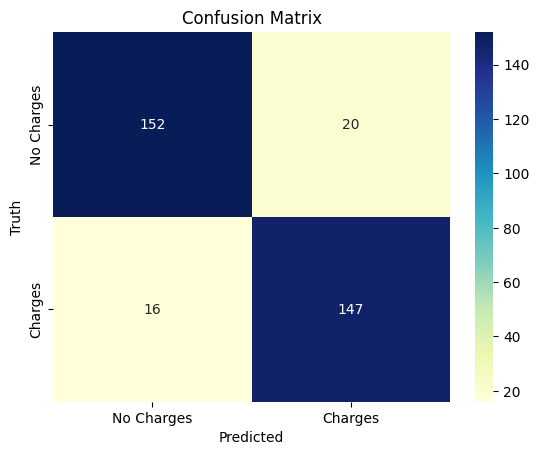

In [ ]:


sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
             xticklabels=["No Charges", "Charges"],
             yticklabels=["No Charges", "Charges"])

plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
KNN (classifier algorithim)

In [ ]:
mi_dummy.shape

(1338, 9)

In [ ]:
print(1338 ** 0.5)

36.578682316343766


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=37)

In [ ]:

model2.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=37)

In [ ]:
Y_pred = model2.predict(x_test)
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':Y_pred,'Actual':Y_test})
knn

,Predicted,Actual
764,0,0
887,0,0
890,1,1
1293,0,0
259,0,1
...,...,...
342,1,1
308,1,1
1128,0,1
503,0,1


In [ ]:
accuracy_score(Y_test,Y_pred)

0.7731343283582089

In [ ]:
cm2 = confusion_matrix(Y_test,Y_pred)
cm2

array([[157,  15],
       [ 61, 102]])

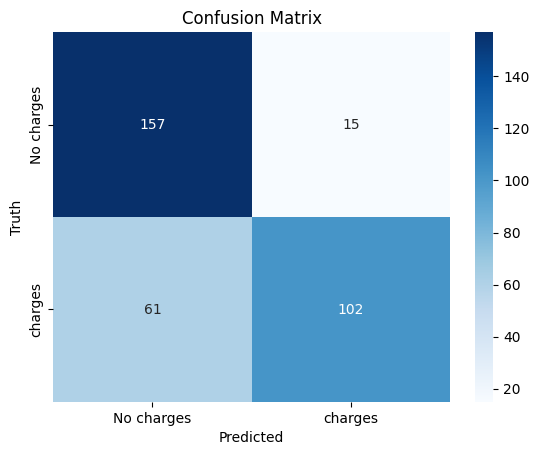

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["No charges", "charges"], yticklabels=["No charges", "charges"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
a = mi_dummy.drop(['charges'],axis=1)
b= mi_dummy['charges']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=.3, random_state=42)
print(a_train.shape,b_train.shape,a_test.shape,b_test.shape)

(936, 8) (936,) (402, 8) (402,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=4)
model.fit(a_train,b_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
b_pred = model.predict(a_test)

b_pred

array([ 8338.301175 ,  8867.218625 , 17842.4333   ,  8986.403275 ,
       18600.414695 , 16230.28683  ,  4918.0163125, 14174.7578375,
        6717.7269875, 16595.6053325, 11800.556025 , 14894.5171625,
       11752.0103125, 18395.749375 , 33588.455135 , 17842.570125 ,
       27791.9404375, 21173.3583475, 16175.2641925, 10636.6156125,
       14032.642205 , 16082.673075 ,  1710.4250125,  2498.2547   ,
       12990.28657  , 11188.855825 , 19229.7394325,  9369.6438975,
       13163.896925 ,  6702.5071125,  7874.4367125, 11964.1424   ,
        8360.9168625, 10675.7063   ,  2921.6543   , 18577.1094775,
        2373.5479125, 13556.88368  , 10683.2638875, 25578.9658075,
       11364.7706775, 10203.4550375, 13990.5125275, 16523.0476425,
        5140.8474875, 12504.3162375,  8937.5004425, 16063.10143  ,
       13067.7865725,  8235.25648  , 14164.5850375,  9133.28526  ,
        6038.1820875,  5263.804825 , 27669.4733375, 17907.9945   ,
        3821.8958625,  5147.389875 , 11940.7904875, 18731.1644

In [ ]:
knn2 = pd.DataFrame({'Predicted':b_pred,'Actual':b_test})
knn2

,Predicted,Actual
764,8338.301175,9095.06825
887,8867.218625,5272.17580
890,17842.433300,29330.98315
1293,8986.403275,9301.89355
259,18600.414695,33750.29180
...,...,...
701,19370.718600,9541.69555
672,8867.218625,4399.73100
1163,11883.655572,2200.83085
1103,18297.896790,11363.28320


In [ ]:
from sklearn.metrics import r2_score
r2_score(b_test,b_pred)

0.17498841440859247

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(b_test,b_pred)

7347.311935992538

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(b_test,b_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

120966752.7419757
10998.488657173571


In [ ]:
Decision Trees

In [ ]:
feature_cols = ['age', 'bmi', 'children', 'sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']
s = df1[feature_cols] # Features
r = df1['catcharges']
s_train, s_test, r_train, r_test = train_test_split(s, r, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(s_train,r_train)

In [ ]:
r_pred = clf.predict(s_test)
print("Accuracy:",metrics.accuracy_score(r_test, r_pred))

Accuracy: 0.8955223880597015


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(s_train,r_train)

r_pred = clf.predict(s_test)

print("Accuracy:",metrics.accuracy_score(r_test, r_pred))

Accuracy: 0.8980099502487562


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

clf = clf.fit(s_train,r_train)

y_pred = clf.predict(s_test)

print("Accuracy:",metrics.accuracy_score(r_test, r_pred))

Accuracy: 0.8980099502487562


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

clf = clf.fit(s_train,r_train)

y_pred = clf.predict(s_test)

print("Accuracy:",metrics.accuracy_score(r_test, r_pred))

Accuracy: 0.8980099502487562


In [ ]:
r_pred_train = clf.predict(s_train)

print("Accuracy:",metrics.accuracy_score(r_train, r_pred_train))

Accuracy: 0.9198717948717948


In [ ]:

Decision Trees Random forest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

In [ ]:
A = df1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
B = df1['catcharges']

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3)

In [ ]:
print(A_train.shape)
print(B_train.shape)
print(A_test.shape)
print(B_test.shape)

(936, 8)
(936,)
(402, 8)
(402,)


In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(A_train, B_train)

DecisionTreeClassifier()

In [ ]:
B_pred = dt.predict(A_test)

In [ ]:
print(classification_report(B_test, B_pred))
print(confusion_matrix(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       188
           1       0.85      0.88      0.87       214

    accuracy                           0.86       402
   macro avg       0.86      0.85      0.85       402
weighted avg       0.86      0.86      0.86       402

[[156  32]
 [ 26 188]]


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(A_train, B_train)

RandomForestClassifier()

In [ ]:
B_pred = rf.predict(A_test)

In [ ]:
print(classification_report(B_test, B_pred))
print(confusion_matrix(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       188
           1       0.95      0.89      0.92       214

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402

[[179   9]
 [ 24 190]]


In [ ]:
Decision tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
D = df1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
F = df1['catcharges']

In [ ]:
D_train, D_test, F_train, F_test = train_test_split(D, F, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeRegressor()
model.fit(D_train, F_train)

DecisionTreeRegressor()

In [ ]:
F_pred = model.predict(D_test)

In [ ]:
mse = mean_squared_error(F_test, F_pred)
r2 = r2_score(F_test, F_pred)
print("mse:",mse)
print("r-squared:",r2)

mse: 0.12189054726368159
r-squared: 0.5120029728725382


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(F_test,F_pred)

0.12189054726368159

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees
model.fit(D_train, F_train)

RandomForestRegressor(random_state=42)

In [ ]:
F_pred = model.predict(D_test)

mse = mean_squared_error(F_test, F_pred)
r2 = r2_score(F_test, F_pred)
print("mse:",mse)
print("r2:",r2)

mse: 0.06802363184079602
r2: 0.7276628019323672


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(F_test,F_pred)

0.13395522388059702

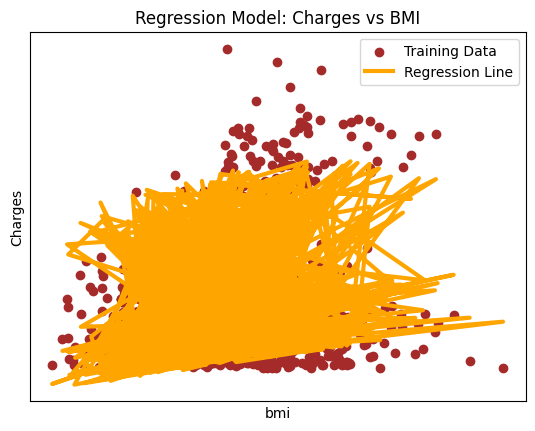

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

plt.scatter(X_train['bmi'], y_train, color='brown', label='Training Data')

plt.plot(X_train['bmi'], model.predict(X_train), color='orange', linewidth=3, label='Regression Line')


plt.xlabel('bmi')
plt.ylabel('Charges')
plt.title('Regression Model: Charges vs BMI')
plt.legend()

plt.xticks(())
plt.yticks(())


plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled X_train data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Scaled X_train data:
        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0  1.544465  0.103182 -0.915011 -1.025978   -0.512989          1.757082   
1  0.481874 -0.490845 -0.915011  0.974679   -0.512989         -0.569125   
2  1.048589  0.226660  1.560279 -1.025978   -0.512989         -0.569125   
3  1.119429  0.023923 -0.915011  0.974679    1.949359         -0.569125   
4 -1.005753  2.502650  0.735182  0.974679    1.949359         -0.569125   

   region_southeast  region_southwest  
0         -0.593802         -0.557606  
1         -0.593802          1.793381  
2          1.684062         -0.557606  
3         -0.593802         -0.557606  
4          1.684062         -0.557606  
